In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max.columns', None)
%matplotlib inline

In [2]:
# Import du dataset
# from google.colab import files
# uploaded = files.upload()

# Local
# This data is composed of multiple datasets for each brand of car
# We firstly need to get all those datsets in one plca befor deciding of merging them all together
data_path= './archive'
datasets_dict= {}

for data in os.listdir(data_path):
    datasets_dict[data.replace(".csv", "")] = pd.read_csv(f'{data_path}/{data}')

print(datasets_dict.keys())

dict_keys(['toyota', 'bmw', 'focus', 'vauxhall', 'vw', 'audi', 'cclass', 'skoda', 'hyundi', 'merc', 'ford'])


In [3]:
# We will then check if all the datatsets have the sames columns
data_set_columns= [dataset.columns for dataset in datasets_dict.values()]
[print(sorted(set(columns))) for columns in data_set_columns]

['engineSize', 'fuelType', 'mileage', 'model', 'mpg', 'price', 'tax', 'transmission', 'year']
['engineSize', 'fuelType', 'mileage', 'model', 'mpg', 'price', 'tax', 'transmission', 'year']
['engineSize', 'fuelType', 'mileage', 'model', 'price', 'transmission', 'year']
['engineSize', 'fuelType', 'mileage', 'model', 'mpg', 'price', 'tax', 'transmission', 'year']
['engineSize', 'fuelType', 'mileage', 'model', 'mpg', 'price', 'tax', 'transmission', 'year']
['engineSize', 'fuelType', 'mileage', 'model', 'mpg', 'price', 'tax', 'transmission', 'year']
['engineSize', 'fuelType', 'mileage', 'model', 'price', 'transmission', 'year']
['engineSize', 'fuelType', 'mileage', 'model', 'mpg', 'price', 'tax', 'transmission', 'year']
['engineSize', 'fuelType', 'mileage', 'model', 'mpg', 'price', 'tax(£)', 'transmission', 'year']
['engineSize', 'fuelType', 'mileage', 'model', 'mpg', 'price', 'tax', 'transmission', 'year']
['engineSize', 'fuelType', 'mileage', 'model', 'mpg', 'price', 'tax', 'transmission',

[None, None, None, None, None, None, None, None, None, None, None]

In [4]:
# We need to add a column "manufacturer" on each dataset to keep track of it once they're all merged
manufacturers_dict={
    "focus": "ford",
    "cclass": "mercedes",
    "hyundi": "hyundai",
    "merc": "mercedes",
    "vw": "Volkswagen"
}
for manufacturer, dataset in datasets_dict.items():
    if manufacturer in manufacturers_dict.keys():
      dataset["Manufacturer"]= manufacturers_dict[manufacturer]
    else:
      dataset["Manufacturer"]= manufacturer

# Merging all datasets
- We will use the append() method to do so
    - Some columns describe the same variables but are not named the same way
    - We will therefore have to complete one of the column with the values of the other column

In [5]:
# We merge all datasets together
full_df= pd.concat(
    list(datasets_dict.values()),
    ignore_index= True)

In [6]:
full_df.head()

model  year  price transmission  mileage fuelType    tax   mpg  engineSize  \
0   GT86  2016  16000       Manual    24089   Petrol  265.0  36.2         2.0   
1   GT86  2017  15995       Manual    18615   Petrol  145.0  36.2         2.0   
2   GT86  2015  13998       Manual    27469   Petrol  265.0  36.2         2.0   
3   GT86  2017  18998       Manual    14736   Petrol  150.0  36.2         2.0   
4   GT86  2017  17498       Manual    36284   Petrol  145.0  36.2         2.0   

  Manufacturer  tax(£)  
0       toyota     NaN  
1       toyota     NaN  
2       toyota     NaN  
3       toyota     NaN  
4       toyota     NaN

In [7]:
# Datset columns
full_df.columns

Index(['model', 'year', 'price', 'transmission', 'mileage', 'fuelType', 'tax',
       'mpg', 'engineSize', 'Manufacturer', 'tax(£)'],
      dtype='object')

In [8]:
# Infos
full_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108540 entries, 0 to 108539
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   model         108540 non-null  object 
 1   year          108540 non-null  int64  
 2   price         108540 non-null  int64  
 3   transmission  108540 non-null  object 
 4   mileage       108540 non-null  int64  
 5   fuelType      108540 non-null  object 
 6   tax           94327 non-null   float64
 7   mpg           99187 non-null   float64
 8   engineSize    108540 non-null  float64
 9   Manufacturer  108540 non-null  object 
 10  tax(£)        4860 non-null    float64
dtypes: float64(4), int64(3), object(4)
memory usage: 9.1+ MB


# EDA
- **Target variable**: "price"
- **Shape**: (118150, 17)
- **Missing values**:
  - Clearly the tax(£) with **more than 90% of missing values**  
- **Values types**

In [9]:
# We will work on a copy of this data set
df= full_df.copy()
print(f"full_df: {full_df.shape}, Copy: {df.shape}")

full_df: (108540, 11), Copy: (108540, 11)


In [10]:
df.describe().T

count          mean           std     min       25%      50%  \
year        108540.0   2017.098028      2.130057  1970.0   2016.00   2017.0   
price       108540.0  16890.124046   9756.266820   450.0  10229.50  14698.0   
mileage     108540.0  23025.928469  21176.423684     1.0   7491.75  17265.0   
tax          94327.0    120.256183     63.404805     0.0    125.00    145.0   
mpg          99187.0     55.166825     16.138522     0.3     47.10     54.3   
engineSize  108540.0      1.661644      0.557058     0.0      1.20      1.6   
tax(£)        4860.0    121.147119     58.003289     0.0    125.00    145.0   

                75%       max  
year         2019.0    2060.0  
price       20940.0  159999.0  
mileage     32236.0  323000.0  
tax           145.0     580.0  
mpg            62.8     470.8  
engineSize      2.0       6.6  
tax(£)        145.0     555.0

- We do not see any high coeficient of variance

In [11]:
skew = df.describe().T
skew['coef']=skew['std']/skew['mean']
skew

count          mean           std     min       25%      50%  \
year        108540.0   2017.098028      2.130057  1970.0   2016.00   2017.0   
price       108540.0  16890.124046   9756.266820   450.0  10229.50  14698.0   
mileage     108540.0  23025.928469  21176.423684     1.0   7491.75  17265.0   
tax          94327.0    120.256183     63.404805     0.0    125.00    145.0   
mpg          99187.0     55.166825     16.138522     0.3     47.10     54.3   
engineSize  108540.0      1.661644      0.557058     0.0      1.20      1.6   
tax(£)        4860.0    121.147119     58.003289     0.0    125.00    145.0   

                75%       max      coef  
year         2019.0    2060.0  0.001056  
price       20940.0  159999.0  0.577631  
mileage     32236.0  323000.0  0.919677  
tax           145.0     580.0  0.527248  
mpg            62.8     470.8  0.292540  
engineSize      2.0       6.6  0.335245  
tax(£)        145.0     555.0  0.478784

## Missing values

<AxesSubplot:>

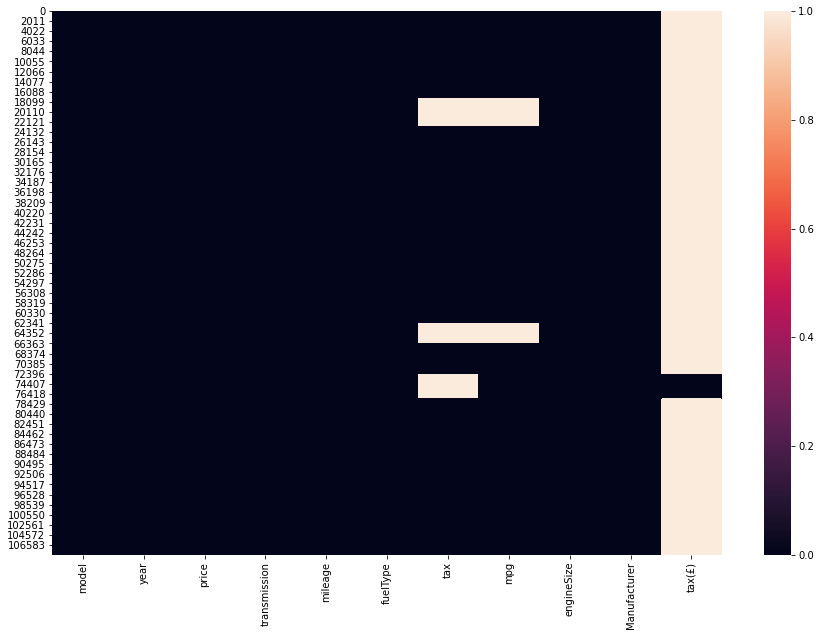

In [12]:
# Heatmap to visualize the empty columns
plt.figure(figsize=(15,10))
sns.heatmap(df.isnull())

In [13]:
# Percentage of missing values per column
(full_df.isnull().sum()/full_df.shape[0] * 100).sort_values(ascending= False)

tax(£)          95.522388
tax             13.094712
mpg              8.617100
model            0.000000
year             0.000000
price            0.000000
transmission     0.000000
mileage          0.000000
fuelType         0.000000
engineSize       0.000000
Manufacturer     0.000000
dtype: float64

In [14]:
# Analysis of columns with more than 90% missing values
missing_cols= df.columns[full_df.isnull().sum()/full_df.shape[0] > 0.90]
missing_cols

Index(['tax(£)'], dtype='object')

### Filling useful columns, deleting the useless ones


In [15]:
# We fillna() the tax column withe the tax(£) columns
df["tax"]= df["tax"].fillna(df["tax(£)"])

# We then drop it
df.drop("tax(£)", inplace=True, axis='columns')

In [16]:
df.isnull().sum()/df.shape[0] *100

model           0.0000
year            0.0000
price           0.0000
transmission    0.0000
mileage         0.0000
fuelType        0.0000
tax             8.6171
mpg             8.6171
engineSize      0.0000
Manufacturer    0.0000
dtype: float64

In [17]:
df.shape

(108540, 10)

### Drop NaN values

In [18]:
df.isnull().sum()/df.shape[0]

model           0.000000
year            0.000000
price           0.000000
transmission    0.000000
mileage         0.000000
fuelType        0.000000
tax             0.086171
mpg             0.086171
engineSize      0.000000
Manufacturer    0.000000
dtype: float64

In [19]:
# We can drop the Nan values as they represent only 8% of the datframe
print(df.shape)
df= df.dropna()
print(df.shape)


(108540, 10)
(99187, 10)


## Numerical Values

In [20]:
df.dtypes

model            object
year              int64
price             int64
transmission     object
mileage           int64
fuelType         object
tax             float64
mpg             float64
engineSize      float64
Manufacturer     object
dtype: object

In [21]:
# List of numerical columns
df_numerical= [col for col in df.columns if df[col].dtype != 'object']
df_numerical

['year', 'price', 'mileage', 'tax', 'mpg', 'engineSize']

In [22]:
"""Distribution of numerical values"""

fig, ax = plt.subplots(3, 2, 
                       figsize=(10, 14))
col= 1
for i in df[df_numerical].columns:
    plt.subplot(4, 2, col)
    sns.distplot(df[i], color='blue')
    col=col+1
    plt.xlabel(i, fontsize=12)
    plt.legend()
plt.show()

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


### Target: price
- Our target 'price' is an object column, we will transform it to int
- **Distribution study**:
  - *Positive skewness factor*: verified by mean > median > mode
    -  We therefore know that we have some outliers with high weight, we keep it in mind just in case
    

In [23]:
# We will transform ou data frame to take values only where price is not null
df= df.dropna(subset=['price'])
df.shape

(99187, 10)

In [24]:
# We convert price column 
price_col= df.price.astype(str)
price_col= price_col.str.replace('[£\,]','').astype(float)

<AxesSubplot:xlabel='price', ylabel='Density'>

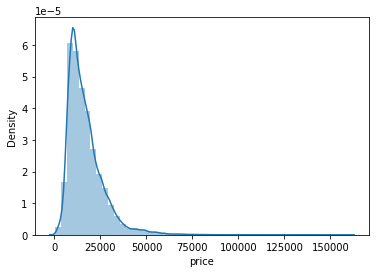

In [25]:
# Target variable distribution
sns.distplot(price_col)

In [26]:
# Stastical informations abour target
print(f"Median: {price_col.median()}\nMean: {price_col.mean()}\nMode: {price_col.mode()}")

Median: 14495.0
Mean: 16805.347656446913
Mode: 0    9995.0
dtype: float64


In [27]:
# Clearer view of our target
sns.boxplot(price_col)

<AxesSubplot:xlabel='price'>

In [28]:
# finally we replace the column in our dataset
df.price= price_col

In [29]:
# Check of the type once again
df.dtypes

model            object
year              int64
price           float64
transmission     object
mileage           int64
fuelType         object
tax             float64
mpg             float64
engineSize      float64
Manufacturer     object
dtype: object

- Automatic and semi-auto worth more money than manual transmission

<AxesSubplot:xlabel='transmission', ylabel='price'>

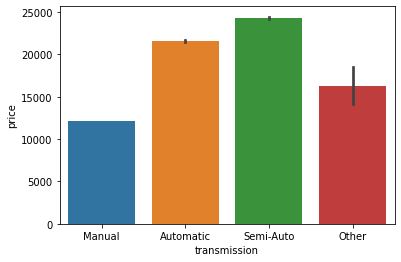

In [30]:
# Price by transmission type
sns.barplot(x = df["transmission"], y = df["price"])

- Mercedes/audi/BMW are the manufacturer which worth the most money

<AxesSubplot:xlabel='Manufacturer', ylabel='price'>

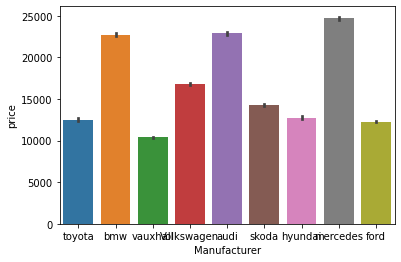

In [31]:
# Price by manufacturer
sns.barplot(x = df["Manufacturer"], y = df["price"])

- The most recent cars worth the most money
- We can also see that cars old enought to be considered as **collection cars (here 1970) worth also good money**

<AxesSubplot:xlabel='year', ylabel='price'>

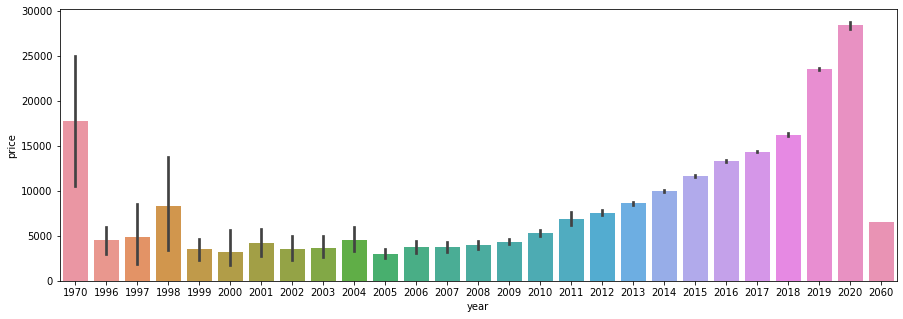

In [32]:
# Price by year
plt.figure(figsize=(15,5),facecolor='w') 
sns.barplot(x = df["year"], y = df["price"])

### Mileage
- No NaN values
- Obvious negative corrrelation between price and mileage
  - will show a correlation heatmap later in the study


In [33]:
df.mileage.isnull().sum()

0

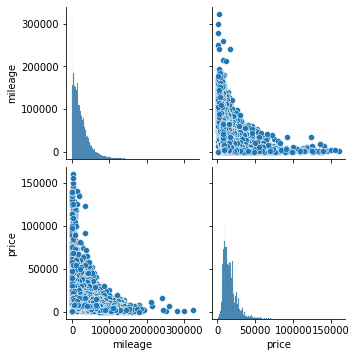

In [34]:
sns.pairplot(df[['mileage', 'price']])

### Engine Size



In [35]:
df.engineSize.isnull().sum()

0

In [36]:
sns.distplot(df.engineSize)

<AxesSubplot:xlabel='engineSize', ylabel='Density'>

### Year
- No NaN values
- Value with year =2060
  - Delete this row

In [37]:
df.year.isnull().sum()

0

In [38]:
sns.boxplot(df.year)

<AxesSubplot:xlabel='year'>

In [39]:
# Value at 2060 outlier
df.year.sort_values()

89528     1970
33810     1970
16363     1996
107453    1996
28830     1997
          ... 
59307     2020
13941     2020
43499     2020
9503      2020
108301    2060
Name: year, Length: 99187, dtype: int64

In [40]:
# Deleting this row
df= df[df.year<=2021]

In [41]:
df.year.max()

2020

## Categorical values


#### Models
- No NaN values in this column
- We can observe the most present cars model for each manufacturer
- The most present model in the dataset

In [42]:
# null values
df.model.isnull().sum()

0

In [43]:
# Number of models
len(df.model.unique())

195

In [44]:
# Population of each model for a given manufacturer
plt.figure(figsize=(7,11))
df["model"].hist(by= df.Manufacturer, figsize= (15,11))

array([[<AxesSubplot:title={'center':'Volkswagen'}>,
        <AxesSubplot:title={'center':'audi'}>,
        <AxesSubplot:title={'center':'bmw'}>],
       [<AxesSubplot:title={'center':'ford'}>,
        <AxesSubplot:title={'center':'hyundai'}>,
        <AxesSubplot:title={'center':'mercedes'}>],
       [<AxesSubplot:title={'center':'skoda'}>,
        <AxesSubplot:title={'center':'toyota'}>,
        <AxesSubplot:title={'center':'vauxhall'}>]], dtype=object)

<Figure size 504x792 with 0 Axes>

In [45]:
# Most represented model in dataset
df.model.value_counts(normalize= True)*100

 Fiesta             6.609804
 Golf               4.902910
 Focus              4.625653
 C Class            3.777751
 Corsa              3.469240
                      ...   
220                 0.001008
 Escort             0.001008
 Amica              0.001008
 Transit Tourneo    0.001008
230                 0.001008
Name: model, Length: 195, dtype: float64

#### Transmission
- No NaN values
- Distribution of each kind of transmission
- Most of the transmissions are manual


In [46]:
df.transmission.isnull().sum()

0

In [47]:
df.transmission.value_counts(normalize=True)*100

Manual       56.908233
Semi-Auto    22.863106
Automatic    20.219587
Other         0.009074
Name: transmission, dtype: float64

<AxesSubplot:xlabel='transmission', ylabel='count'>

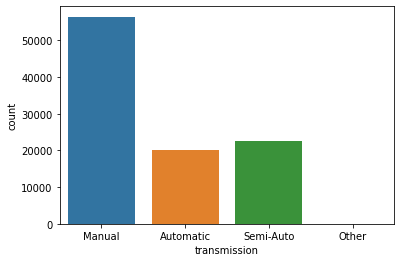

In [48]:
sns.countplot(df.transmission)

#### Fuel type
- No NaN values
- Different kind of fuel type in the dataset
- Most present fuel type is Petrol

In [49]:
df["fuelType"].isnull().sum()

0

In [50]:
plt.figure(figsize=(11,7))
plt.xticks(rotation=90)
sns.countplot(df['fuelType'])

<AxesSubplot:xlabel='fuelType', ylabel='count'>

In [51]:
df.columns

Index(['model', 'year', 'price', 'transmission', 'mileage', 'fuelType', 'tax',
       'mpg', 'engineSize', 'Manufacturer'],
      dtype='object')

## Correlations
- Important correlations:
  - year/mileage: -0.74
  - year/price: +0.49
  - price/engineSize: +0.64
  - tax/mpg: -0.45
  - price/mileage: -0.42

In [52]:
# Correlation heatmap
sns.heatmap(df.corr(),
            annot= True,
            square= True,
            linewidth=1, linecolor='w')

<AxesSubplot:>

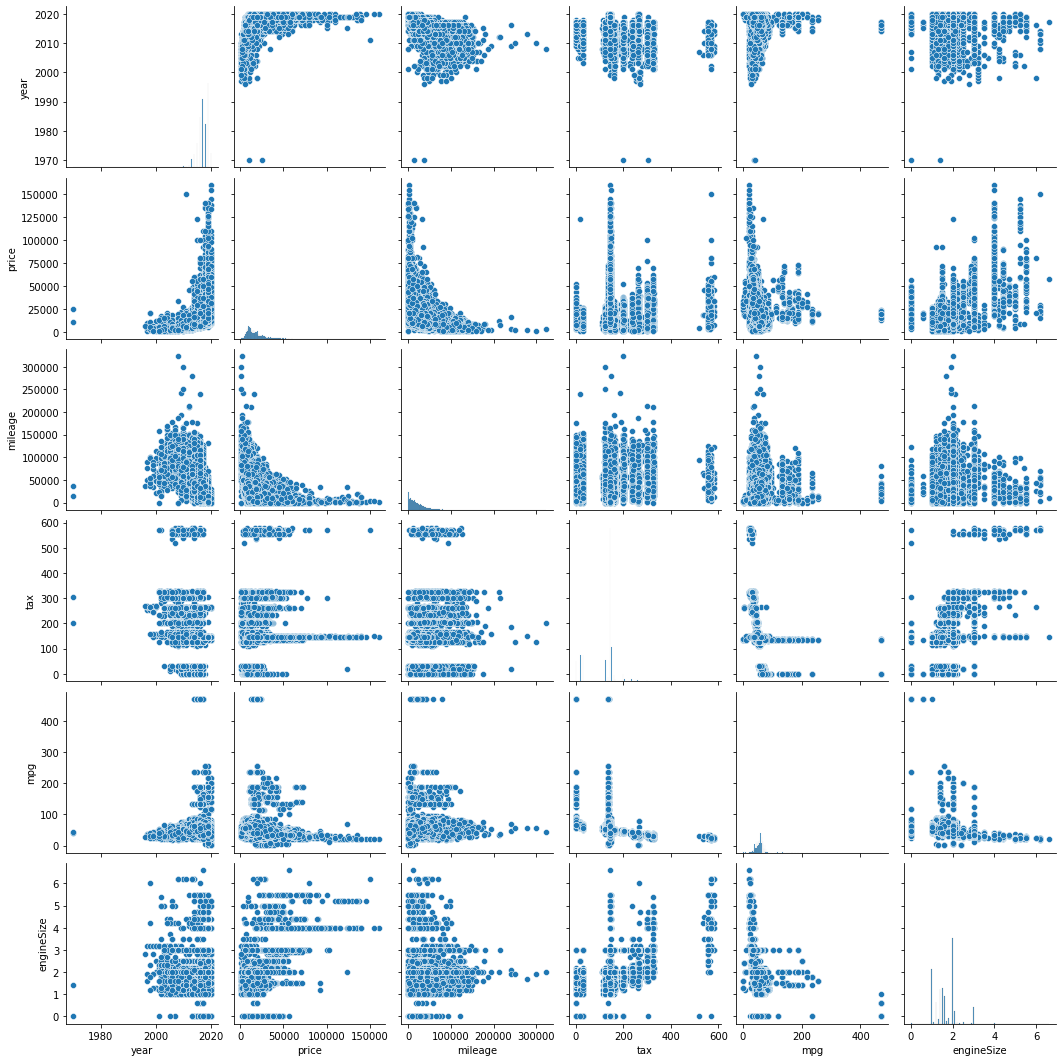

In [53]:
# Pair plots
sns.pairplot(df.sample(frac= 0.8))

## Features creation
- We will create:
  - "Country" feature based on the manufacturer's country
  - "Age" feature based on the age of the car, easily computable
- We will remove the year column to avoid correlation

In [54]:
# Country column
map_country={
    'bmw':'germany', 
    'mercedes':'germany', 
    'audi':'germany', 
    'vauxhall': 'USA', 
    'ford': 'USA', 
    'toyota':'japan', 
    'hyundai':'south_korea',
    'Volkswagen':'germany', 
    'skoda': 'czech'
}

df["country"]= df["Manufacturer"].map(map_country)
df[["Manufacturer", "country"]].head(3)

Manufacturer country
0       toyota   japan
1       toyota   japan
2       toyota   japan

In [55]:
# Age column
df["age"]= abs(df["year"]-2021)
df[["year", "age"]].head(3)

year  age
0  2016    5
1  2017    4
2  2015    6

In [56]:
# Droping the year column
df.drop("year", axis=1, inplace=True)
df.columns

Index(['model', 'price', 'transmission', 'mileage', 'fuelType', 'tax', 'mpg',
       'engineSize', 'Manufacturer', 'country', 'age'],
      dtype='object')

# Data pre-processing

In [57]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler

In [58]:
# Categorical columns
df_categorical = [col for col in df.columns if df[col].dtype =='object']
print(df_categorical)

# Numerical columns
df_numerical = [col for col in df.columns if df[col].dtype !='object']
print(df_numerical)

['model', 'transmission', 'fuelType', 'Manufacturer', 'country']
['price', 'mileage', 'tax', 'mpg', 'engineSize', 'age']


## One Hot encoder
- In order to have only numerical values, we need to encode our categorical data
- We will choose pandas.get_dummies over OHE from sklearn since it will keep column names more recognizable

In [59]:
# One Hot encoder
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(sparse= False, drop='first')
test = ohe.fit_transform(df[df_categorical])
test

array([[0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [60]:
# Pandas dummies
df_expended= pd.get_dummies(df)
df_expended.shape

(99186, 224)

In [61]:
df_expended.head()

price  mileage    tax   mpg  engineSize  age  model_ 1 Series  \
0  16000.0    24089  265.0  36.2         2.0    5                0   
1  15995.0    18615  145.0  36.2         2.0    4                0   
2  13998.0    27469  265.0  36.2         2.0    6                0   
3  18998.0    14736  150.0  36.2         2.0    4                0   
4  17498.0    36284  145.0  36.2         2.0    4                0   

   model_ 2 Series  model_ 3 Series  model_ 4 Series  model_ 5 Series  \
0                0                0                0                0   
1                0                0                0                0   
2                0                0                0                0   
3                0                0                0                0   
4                0                0                0                0   

   model_ 6 Series  model_ 7 Series  model_ 8 Series  model_ A Class  \
0                0                0                0               0   
1                0                0                0               0   
2                0                0                0               0   
3                0                0                0               0   
4                0                0                0               0   

   model_ A1  model_ A2  model_ A3  model_ A4  model_ A5  model_ A6  \
0          0          0          0          0          0          0   
1          0          0          0          0          0          0   
2          0          0          0          0          0          0   
3          0          0          0          0          0          0   
4          0          0          0          0          0          0   

   model_ A7  model_ A8  model_ Accent  model_ Adam  model_ Agila  \
0          0          0              0            0             0   
1          0          0              0            0             0   
2          0          0              0            0             0   
3          0          0              0            0             0   
4          0          0              0            0             0   

   model_ Amarok  model_ Amica  model_ Ampera  model_ Antara  model_ Arteon  \
0              0             0              0              0              0   
1              0             0              0              0              0   
2              0             0              0              0              0   
3              0             0              0              0              0   
4              0             0              0              0              0   

   model_ Astra  model_ Auris  model_ Avensis  model_ Aygo  model_ B Class  \
0             0             0               0            0               0   
1             0             0               0            0               0   
2             0             0               0            0               0   
3             0             0               0            0               0   
4             0             0               0            0               0   

   model_ B-MAX  model_ Beetle  model_ C Class  model_ C-HR  model_ C-MAX  \
0             0              0               0            0             0   
1             0              0               0            0             0   
2             0              0               0            0             0   
3             0              0               0            0             0   
4             0              0               0            0             0   

   model_ CC  model_ CL Class  model_ CLA Class  model_ CLC Class  model_ CLK  \
0          0                0                 0                 0           0   
1          0                0                 0                 0           0   
2          0                0                 0                 0           0   
3          0                0                 0                 0           0   
4          0                0                 0           

## Standardisation
- We will then standardize all the variables in the data set
- The standard score of a sample x is calculated as:

```
    z = (x - u) / s
```

  - u --> is the mean of the training samples or zero if with_mean=False
  - s --> is the standard deviation of the training samples or one if with_std=False.

In [62]:
# Standard scaler whithout standardisation
from sklearn.preprocessing import RobustScaler
stder= StandardScaler(with_std= False)

df_expended_std = stder.fit_transform(df_expended)
df_expended_std = pd.DataFrame(df_expended_std, columns = df_expended.columns)
print(df_expended_std.shape)
df_expended_std.head()

(99186, 224)


price       mileage         tax       mpg  engineSize       age  \
0  -805.451606   1030.405874  144.701016 -18.96695    0.336717  1.087291   
1  -810.451606  -4443.594126   24.701016 -18.96695    0.336717  0.087291   
2 -2807.451606   4410.405874  144.701016 -18.96695    0.336717  2.087291   
3  2192.548394  -8322.594126   29.701016 -18.96695    0.336717  0.087291   
4   692.548394  13225.405874   24.701016 -18.96695    0.336717  0.087291   

   model_ 1 Series  model_ 2 Series  model_ 3 Series  model_ 4 Series  \
0        -0.019852        -0.012391         -0.02463        -0.010032   
1        -0.019852        -0.012391         -0.02463        -0.010032   
2        -0.019852        -0.012391         -0.02463        -0.010032   
3        -0.019852        -0.012391         -0.02463        -0.010032   
4        -0.019852        -0.012391         -0.02463        -0.010032   

   model_ 5 Series  model_ 6 Series  model_ 7 Series  model_ 8 Series  \
0        -0.010647        -0.001089        -0.001069        -0.000393   
1        -0.010647        -0.001089        -0.001069        -0.000393   
2        -0.010647        -0.001089        -0.001069        -0.000393   
3        -0.010647        -0.001089        -0.001069        -0.000393   
4        -0.010647        -0.001089        -0.001069        -0.000393   

   model_ A Class  model_ A1  model_ A2  model_ A3  model_ A4  model_ A5  \
0        -0.02582  -0.013581   -0.00001  -0.019448  -0.013923  -0.008892   
1        -0.02582  -0.013581   -0.00001  -0.019448  -0.013923  -0.008892   
2        -0.02582  -0.013581   -0.00001  -0.019448  -0.013923  -0.008892   
3        -0.02582  -0.013581   -0.00001  -0.019448  -0.013923  -0.008892   
4        -0.02582  -0.013581   -0.00001  -0.019448  -0.013923  -0.008892   

   model_ A6  model_ A7  model_ A8  model_ Accent  model_ Adam  model_ Agila  \
0  -0.007541   -0.00123   -0.00119       -0.00001    -0.004668     -0.000222   
1  -0.007541   -0.00123   -0.00119       -0.00001    -0.004668     -0.000222   
2  -0.007541   -0.00123   -0.00119       -0.00001    -0.004668     -0.000222   
3  -0.007541   -0.00123   -0.00119       -0.00001    -0.004668     -0.000222   
4  -0.007541   -0.00123   -0.00119       -0.00001    -0.004668     -0.000222   

   model_ Amarok  model_ Amica  model_ Ampera  model_ Antara  model_ Arteon  \
0      -0.001119      -0.00001       -0.00003      -0.000272        -0.0025   
1      -0.001119      -0.00001       -0.00003      -0.000272        -0.0025   
2      -0.001119      -0.00001       -0.00003      -0.000272        -0.0025   
3      -0.001119      -0.00001       -0.00003      -0.000272        -0.0025   
4      -0.001119      -0.00001       -0.00003      -0.000272        -0.0025   

   model_ Astra  model_ Auris  model_ Avensis  model_ Aygo  model_ B Class  \
0      -0.02828     -0.007178       -0.001159    -0.019771       -0.005959   
1      -0.02828     -0.007178       -0.001159    -0.019771       -0.005959   
2      -0.02828     -0.007178       -0.001159    -0.019771       -0.005959   
3      -0.02828     -0.007178       -0.001159    -0.019771       -0.005959   
4      -0.02828     -0.007178       -0.001159    -0.019771       -0.005959   

   model_ B-MAX  model_ Beetle  model_ C Class  model_ C-HR  model_ C-MAX  \
0     -0.003579      -0.000837       -0.037778    -0.004829     -0.005475   
1     -0.003579      -0.000837       -0.037778    -0.004829     -0.005475   
2     -0.003579      -0.000837       -0.037778    -0.004829     -0.005475   
3     -0.003579      -0.000837       -0.037778    -0.004829     -0.005475   
4     -0.003579      -0.000837       -0.037778    -0.004829     -0.005475   

   model_ CC  model_ CL Class  model_ CLA Class  model_ CLC Class  model_ CLK  \
0  -0.000958        -0.005152         -0.000867          -0.00003   -0.000071   
1  -0.000958        -0.005152         -0.000867          -0.00003   -0.000071   
2  -0.000958        -0.005152         -0.000867          -0.00003   -0.000071   
3  -0

## Splitting sets

In [63]:
# Features
X= df_expended_std.drop("price", axis=1)

# Target
y= df_expended_std["price"]

print(f"X: {X.shape}\ny: {y.shape}")

X: (99186, 223)
y: (99186,)


In [64]:
# We creat our test and train sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.25, random_state=42)

In [65]:
size={
    "x_test": X_test.shape,
    "x_train": X_train.shape,
    "y_test": y_test.shape,
    "y_train": y_train.shape
}
print(size)

{'x_test': (24797, 223), 'x_train': (74389, 223), 'y_test': (24797,), 'y_train': (74389,)}


# **Model**

- For this regression study, we need to predic the price of a car based on all the different given parameters, in order to do so we will use a linear regression model.
- We have:
  - Feature engineered (kind of) by creating two variables, age and country of the manufacturer.
  - Pre processed our data: One Hot Encoder, Standardisation
- We will:
  - Select the best features with SelectKBest: Trying multiple sets of features and choose a suitable number of features.

## Selecting best features
- We have 223 features after the OHE with pd.get_dummies(), **I will therefore use the SelectKbest()** from sklearn in order to select the best features to apply regression.
  - **SelectKBest** will do for us an univariate feature selection with a scoring based on f_regression. It will select the k best features based of the scoring of each one against the data set
- I will **select from 4 to 223 features (k) on f_regression** in order to see the most revelant features in the dataset.
- **We will select 158 features**

In [75]:
column_names = df_expended_std.drop('price', axis= 1).columns

no_of_features = []
r_squared_train = []
r_squared_test = []

# We iterate over a range of 4, 223 for the number of best features
for k in range(4, 224, 2):
    selector = SelectKBest(f_regression, 
                           k = k)
    
    # Our transformed sets with the k-best features
    X_train_transformed = selector.fit_transform(X_train, y_train)
    X_test_transformed = selector.transform(X_test)

    # We train a basic regression model on those transformed sets
    regressor = LinearRegression()
    regressor.fit(X_train_transformed, y_train)


    no_of_features.append(k)
    r_squared_train.append(regressor.score(X_train_transformed, y_train))
    r_squared_test.append(regressor.score(X_test_transformed, y_test))
    
sns.lineplot(x = no_of_features, y = r_squared_train, legend = 'full')
sns.lineplot(x = no_of_features, y = r_squared_test, legend = 'full')

<AxesSubplot:>

In [76]:
# We can see that the curve stabilizes around ~160 variables
# We will inspect more closely

max_test_score= max(r_squared_test)
index_max= r_squared_test.index(max_test_score)
print(f"Best score is obtained for {no_of_features[index_max]} features --> score: {max_test_score}") 

Best score is obtained for 218 features --> score: 0.8621634259451585


- 158 features seems a good choice as it's shows the first score of at least 0.85

In [77]:
# We will see with less variables
for n_features in range(50, 224,2):
  index_reasonable= no_of_features.index(n_features)
  score= r_squared_test[index_reasonable]
  print("--",n_features, score)

-- 50 0.8205858351887494
-- 52 0.8212562719337079
-- 54 0.8220503491879796
-- 56 0.8241795148532896
-- 58 0.8288100706061359
-- 60 0.8288100706057184
-- 62 0.8298987695100483
-- 64 0.8308061404298852
-- 66 0.831462067298377
-- 68 0.8326125937834294
-- 70 0.8346218149204276
-- 72 0.8374405173249392
-- 74 0.838977548477591
-- 76 0.8405974339098093
-- 78 0.8406531896411279
-- 80 0.8410305170537434
-- 82 0.8423896793093677
-- 84 0.8427363001279502
-- 86 0.8432251458898209
-- 88 0.8433943305347098
-- 90 0.843897071300335
-- 92 0.8441612784811421
-- 94 0.8443505756399237
-- 96 0.8445101134201237
-- 98 0.8466089954236238
-- 100 0.846900384565455
-- 102 0.847271962332521
-- 104 0.8487130801311805
-- 106 0.8494398558670332
-- 108 0.849472537877246
-- 110 0.8499342009339464
-- 112 0.8502671267783909
-- 114 0.8504973092872455
-- 116 0.8512426698453993
-- 118 0.8516079603155222
-- 120 0.8521680169667071
-- 122 0.8527065393005351
-- 124 0.8527376229042705
-- 126 0.8531324793964875
-- 128 0.85332280

<AxesSubplot:>

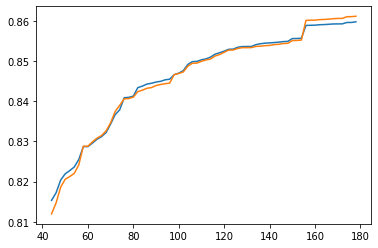

In [69]:
sns.lineplot(x = no_of_features[20:], y = r_squared_train[20:], legend = 'full')
sns.lineplot(x = no_of_features[20:], y = r_squared_test[20:], legend = 'full')

In [86]:
# We selected 158 columns, let see them
selector = SelectKBest(f_regression, k = 158)

# Transformed sets
X_train_transformed = selector.fit_transform(X_train, y_train)
X_test_transformed = selector.transform(X_test)

# Names of best features
kbest_features = list(column_names[selector.get_support()])

## Trying different models
- We will choose the DecisionTreeRegressor as it gives us a R^2 of 0.92

In [87]:
# Function to try our different models later
def test_regressor_model(models_list, X_train_transformed, X_test_transformed, y_train, y_test):
  """
  - models_list: list of tuple, 
    - tuple[0] = model to test, 
    - tuple[1] = model_name
  """
  for model in models_list:
    model[0].fit(X_train_transformed, y_train)

    y_pred= model[0].predict(X_test_transformed)
    score= model[0].score(X_test_transformed, y_test)
    print(f"{model[1]:-<50}{score}")


In [88]:
# Creation of the list of models we want to test
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Ridge, ElasticNet, Lasso

models_list= [(DecisionTreeRegressor(), "DecisionTreeRegressor"),
              (Ridge(), "Ridge regression"),
              (ElasticNet(), "Elastic Net"),
              (Lasso(), "Lasso")]

# Scoring              
test_regressor_model(models_list, X_train_transformed, X_test_transformed, y_train, y_test)

DecisionTreeRegressor-----------------------------0.9381738557977707
Ridge regression----------------------------------0.8594267971871437
Elastic Net---------------------------------------0.6600236046566259
Lasso---------------------------------------------0.8558011760101556


# Model optimisation
- We will try to optimise as much as possible our selected model

In [120]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

params= {'min_samples_split': [2,3,4,5,6,7,8,9,10,11]}
grid= GridSearchCV(DecisionTreeRegressor(), params, n_jobs=15)

grid.fit(X_train_transformed, y_train)

GridSearchCV(estimator=DecisionTreeRegressor(), n_jobs=15,
             param_grid={'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11]})

In [121]:
print(grid.best_params_)

{'min_samples_split': 11}


In [123]:
from sklearn.metrics import r2_score

y_pred= grid.predict(X_test_transformed)

r2_score(y_test, y_pred)

0.9466969172323186